In this Colab, we will use a keras Long Short-Term Memory (LSTM) model to predict the stock price of Tata Global Beverages


Here are some imports we need to make: numpy for scientific computation, matplotlib for graphing, and pandas for manipulating data.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load training data set with the "Open" and "High" columns to use in our modeling.

In [5]:
from google.colab import files
uploaded = files.upload()

Saving TATAMOTORS.NS.csv to TATAMOTORS.NS (3).csv


In [24]:
dataset_train = pd.read_csv('TATAMOTORS.NS.csv')
training_set = dataset_train.iloc[:, 1:2].values

Let's take a look at the first five rows of our dataset

In [9]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,504.686737,520.417969,501.322815,518.241333,516.421997,6758676.0
1,2015-01-06,508.891632,508.891632,493.951874,496.079071,494.337524,7979598.0
2,2015-01-07,489.746979,495.089661,484.008514,488.609192,486.893890,9232656.0
3,2015-01-08,498.651459,509.336853,495.683289,506.566559,504.788208,5535587.0
4,2015-01-09,515.718384,519.379150,510.029419,516.757263,514.943115,4053562.0


Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [12]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

Make the necessary imports from keras

In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

Add LSTM layer along with dropout layers to prevent overfitting. After that, we add a Dense layer that specifies a one unit output. Next, we compile the model using the adam optimizer and set the loss as the mean_squarred_error

In [15]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
62/62 [==============================] - 18s 149ms/step - loss: nan
Epoch 2/20
62/62 [==============================] - 8s 128ms/step - loss: nan
Epoch 3/20
62/62 [==============================] - 9s 149ms/step - loss: nan
Epoch 4/20
62/62 [==============================] - 9s 148ms/step - loss: nan
Epoch 5/20
62/62 [==============================] - 8s 130ms/step - loss: nan
Epoch 6/20
62/62 [==============================] - 9s 149ms/step - loss: nan
Epoch 7/20
62/62 [==============================] - 9s 150ms/step - loss: nan
Epoch 8/20
62/62 [==============================] - 8s 130ms/step - loss: nan
Epoch 9/20
62/62 [==============================] - 9s 146ms/step - loss: nan
Epoch 10/20
62/62 [==============================] - 9s 153ms/step - loss: nan
Epoch 11/20
62/62 [==============================] - 9s 138ms/step - loss: nan
Epoch 12/20
62/62 [==============================] - 9s 148ms/step - loss: nan
Epoch 13/20
62/62 [==============================] - 9s 147m

Import the test set for the model to make predictions on

In [16]:
from google.colab import files
uploaded = files.upload()

Saving TATAMOTORS.NS.csv to TATAMOTORS.NS (4).csv


In [27]:
dataset_test = pd.read_csv('TATAMOTORS.NS.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [28]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


Plot our predicted stock prices and the actual stock price

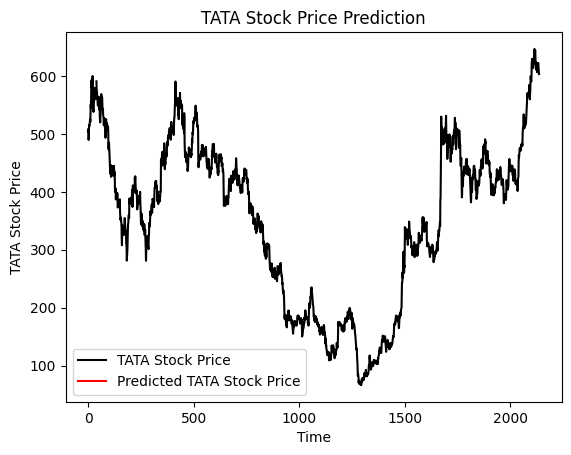

In [30]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()